In [43]:
import json
import numpy as np
import pandas as pd

In [44]:
path = "2023_05_25_20:16:40/result_0.json"

with open('../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [45]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for front in parsed_json[elem][generation]:
                    for individual in parsed_json[elem][generation][front]:
                        dictionary = {}
                        dictionary = {
                            'generation': generation,
                            'front': front,
                            'melody': individual['melody'],
                        }
                        for criterion in metaParameters_df['criteria'].values[0]:
                            dictionary[criterion] = individual['fitness'][criterion]
                        data.append(dictionary)
data_df = pd.DataFrame(data)

In [46]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_11,front_2,80/0.125 73/0.5 81/0.25 74/0.0625 79/0.0625 83...,0.615358,0.328935
1,generation_11,front_2,69/0.4375 49/0.0625 64/0.3125 80/0.0625 R/0.06...,0.611915,0.340278
2,generation_11,front_2,57/0.6875 52/0.1875 R/0.0625 49/0.0625 83/0.37...,0.602617,0.510802
3,generation_11,front_2,71/0.3125 59/0.125 61/0.4375 70/0.0625 66/0.06...,0.486915,0.700231
4,generation_11,front_2,48/0.125 71/0.125 83/0.25 66/0.0625 75/0.125 7...,0.341713,0.716307


In [47]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria
0,NSGA-II,1000,4,16,f1,A,MAJOR,ONE_POINT_CROSSOVER,BAR_ORDER_AND_SIMPLE,0.8,,,200,"[STABILITY, TENSION]"


In [48]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_11,front_2,80/0.125 73/0.5 81/0.25 74/0.0625 79/0.0625 83...,0.615358,0.328935
1,generation_11,front_2,69/0.4375 49/0.0625 64/0.3125 80/0.0625 R/0.06...,0.611915,0.340278
2,generation_11,front_2,57/0.6875 52/0.1875 R/0.0625 49/0.0625 83/0.37...,0.602617,0.510802
3,generation_11,front_2,71/0.3125 59/0.125 61/0.4375 70/0.0625 66/0.06...,0.486915,0.700231
4,generation_11,front_2,48/0.125 71/0.125 83/0.25 66/0.0625 75/0.125 7...,0.341713,0.716307


In [49]:
data_df.loc[0]

generation                                        generation_11
front                                                   front_2
melody        80/0.125 73/0.5 81/0.25 74/0.0625 79/0.0625 83...
STABILITY                                              0.615358
TENSION                                                0.328935
Name: 0, dtype: object

In [50]:
generation = data_df[data_df["generation"] == "200"].sort_values(by=['front'])

In [51]:
list_of_fronts = []
for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]


    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for individual in front_data[criterion]:
            front_temp.append(individual)
        front_elements.append(front_temp)
    list_of_fronts.append(front_elements)


In [52]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

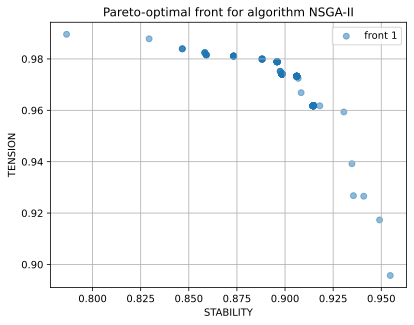

In [77]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y) in enumerate(list_of_fronts):
    ax.scatter(x, y, label = f"front {i+1}", alpha=0.5)


plt.legend()
plt.show()


In [54]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name].sort_values(by=['front'])
    print(generation_name)
    for front in generation["front"].unique():
        front_elements = []
        front_data = generation[generation["front"] == front]

        for criterion in metaParameters_df['criteria'].values[0]:
            front_temp = []
            for individual in front_data[criterion]:
                front_temp.append(individual)
            front_elements.append(front_temp)
        list_of_fronts.append(front_elements)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem[0]):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp

print(average_generations)



generation_1
generation_3
generation_5
generation_7
generation_9
generation_11
generation_13
generation_15
generation_17
generation_19
generation_21
generation_23
generation_25
generation_27
generation_29
generation_31
generation_33
generation_35
generation_37
generation_39
generation_41
generation_43
generation_45
generation_47
generation_49
generation_51
generation_53
generation_55
generation_57
generation_59
generation_61
generation_63
generation_65
generation_67
generation_69
generation_71
generation_73
generation_75
generation_77
generation_79
generation_81
generation_83
generation_85
generation_87
generation_89
generation_91
generation_93
generation_95
generation_97
generation_99
generation_101
generation_103
generation_105
generation_107
generation_109
generation_111
generation_113
generation_115
generation_117
generation_119
generation_121
generation_123
generation_125
generation_127
generation_129
generation_131
generation_133
generation_135
generation_137
generation_139
gener

/var/folders/xt/9n_zwlsd12d73nqvy46sv7dm0000gn/T/ipykernel_28930/2470951745.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X, rotation=90)


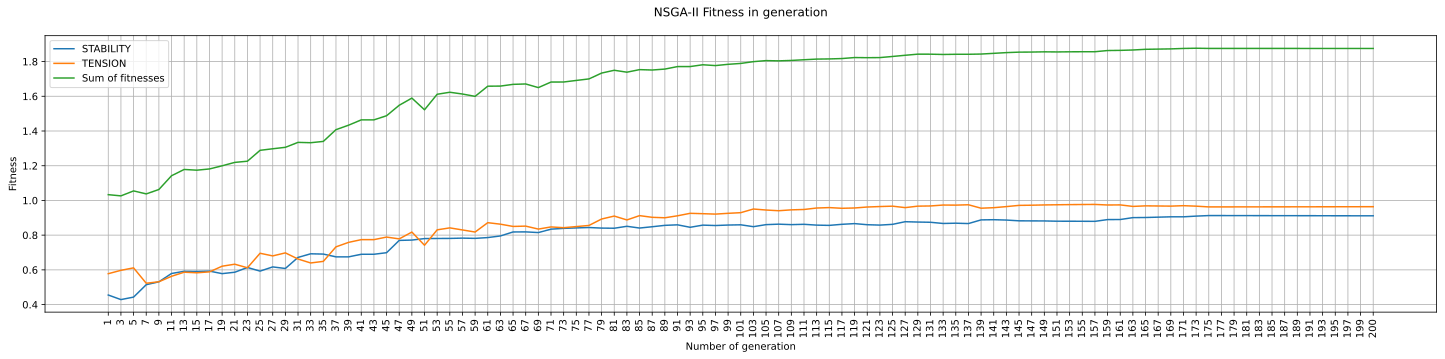

In [55]:
# print(average_generations[:,i])

X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]

fig, ax = plt.subplots(figsize=(25,5))
# ax.set_title("NSGA-II Fitness in generation\n" + path)
ax.set_title("NSGA-II Fitness in generation\n")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xticklabels(X, rotation=90)

ax.set_xlabel("Number of generation")
ax.set_ylabel("Fitness")

ax.grid()

plt.legend()
plt.show()